Exercise 3.1: Copy the source code presented in the previous section to your computer or use m-files provided in the Prog1_Particle_motion directory.  
• Run the program with pre-defined values you should get a curve similar to figure 3.2.   
• What kind of drift is observed?  
• What is the direction of the drift velocity for an electron and a positron?

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def odefun(q, t):
    ''' 
    This is the input function for the ordinary differential equation solver ode45.
    Input: independent variable t(time), 6-dim vector q
    q = [x,y,z,v_x,v_y,v_z]
    Output: time derivative of q, dqdt = dq/dt
    '''
    
    qe = -1.602e-19    # Elementary charge in Coulomb
    m = 9.109e-31      # Particle mass in kg
    
    '''
    Now, we define position and velocity variables using the vector of dependent variables, q.
    This would not be necessary but using "x" instead of q(1), etc.. makes the code
    below more readable
    '''
    
    x = q[0]
    y = q[1]
    z = q[2]
    vx = q[3]
    vy = q[4]
    vz = q[5]
    
    Ex = 0
    Ey = 2e-6
    Ez = 0
    Bx = 0
    By = 0
    Bz = 1e-7
    
    # Now, we calculate the components of the 6-dim vector dq/dtd
    dxdt = vx
    dydt = vy
    dzdt = vz
    dyxdt = qe/m*(Ex + vy*Bz - vz*Bx)
    dvydt = qe/m*(Ey + vz*Bx - vx*Bz)
    dvzdt = qe/m*(Ez + vx*By - vy*Bx)
    
    '''
    Finally, we have to assign the calculated components to the vector variable dqdt, which is
    the output of the function
    '''
    dqdt = [dxdt, dydt, dzdt, dyxdt, dvydt, dvzdt]
    
    return dqdt
    

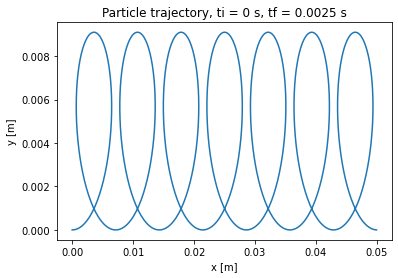

In [45]:
from scipy import integrate as itg

''' 
This matlab script solves the equation of motion for a charged particle in presence of electric
and magnetic fields.

First, we need to define the initial conditions.
Remember, q = [x,y,z,v_x,v_y,v_z]
'''
q0 = np.array([0, 0, 0, 1e2, 0, 0])

# Now we define the time interval, on which we want to solve the ODE.
ti = 0
tf = 2.5e-3
N = 1000
timespan = np.linspace(ti,tf,N)

'''
The function np.linspace(ti, tf, N) creates a linearly spaced vector beginning at "ti"
ending at "tf" with "N" steps/components.

And now for the solving itself 
'''

res = itg.odeint(odefun, q0 , timespan)
# The result will be a vector t and a matrix q with N rows.
x = [ i[0] for i in res]
y = [ i[1] for i in res]
z = [ i[2] for i in res]
# The following commands display the calculated trajectory

fig = plt.figure()
plt.plot(x,y)

plt.xlabel('x [m]')
plt.ylabel('y [m]')

plt.title('Particle trajectory, ti = '+ str(ti)+ ' s, tf = '+ str(tf)+ ' s')
plt.show()

E X B drift is observed in the curve. The direction of the drift velocity for an electron and positron are in the same direction. 

Exercise 3.2: Change the charge qe and the mass m of the particle to those of a proton.  
• How many times do you have to increase the time scale in order to see the characteristic
trajectory of the drift?  
• Compare amplitude of the oscillations of electrons and protons and the magnitude
of their drift velocities (read these data from the plots).

In [2]:
def odefun2(q, t):
    ''' 
    This is the input function for the ordinary differential equation solver ode45.
    Input: independent variable t(time), 6-dim vector q
    q = [x,y,z,v_x,v_y,v_z]
    Output: time derivative of q, dqdt = dq/dt
    '''
    
    qe = 1.602e-19    # Elementary charge in Coulomb
    m = 1.673e-27      # Particle mass in kg
    
    '''
    Now, we define position and velocity variables using the vector of dependent variables, q.
    This would not be necessary but using "x" instead of q(1), etc.. makes the code
    below more readable
    '''
    
    x = q[0]
    y = q[1]
    z = q[2]
    vx = q[3]
    vy = q[4]
    vz = q[5]
    
    Ex = 0
    Ey = 2e-6
    Ez = 0
    Bx = 0
    By = 0
    Bz = 1e-7
    
    # Now, we calculate the components of the 6-dim vector dq/dtd
    dxdt = vx
    dydt = vy
    dzdt = vz
    dyxdt = qe/m*(Ex + vy*Bz - vz*Bx)
    dvydt = qe/m*(Ey + vz*Bx - vx*Bz)
    dvzdt = qe/m*(Ez + vx*By - vy*Bx)
    
    '''
    Finally, we have to assign the calculated components to the vector variable dqdt, which is
    the output of the function
    '''
    dqdt = [dxdt, dydt, dzdt, dyxdt, dvydt, dvzdt]
    
    return dqdt

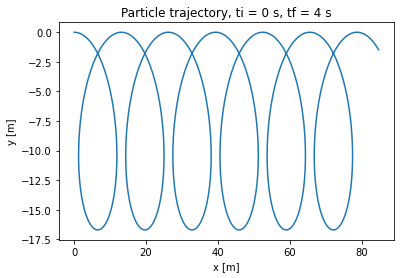

In [12]:
from scipy import integrate as itg

''' 
This matlab script solves the equation of motion for a charged particle in presence of electric
and magnetic fields.

First, we need to define the initial conditions.
Remember, q = [x,y,z,v_x,v_y,v_z]
'''
q0 = np.array([0, 0, 0, 1e2, 0, 0])

# Now we define the time interval, on which we want to solve the ODE.
ti = 0
tf = 4
N = 10000
timespan = np.linspace(ti,tf,N)

'''
The function np.linspace(ti, tf, N) creates a linearly spaced vector beginning at "ti"
ending at "tf" with "N" steps/components.

And now for the solving itself 
'''

res = itg.odeint(odefun2, q0 , timespan)
# The result will be a vector t and a matrix q with N rows.
x = [ i[0] for i in res]
y = [ i[1] for i in res]
z = [ i[2] for i in res]
# The following commands display the calculated trajectory

fig = plt.figure()
plt.plot(x,y)

plt.xlabel('x [m]')
plt.ylabel('y [m]')

plt.title('Particle trajectory, ti = '+ str(ti)+ ' s, tf = '+ str(tf)+ ' s')
plt.show()

I increased the time scale from .0025 s to 4 s in order to see the characteristic trajectory of the drift. This is 1600 times the initial time scale. The amplitude of the oscillation of protons is much larger than the amplitude of the oscillations of the electrons. It is about 7 m for the proton, and about .009 m for the electron.